## Mejores Modelos para Base-Insecta

                Modelo  Precision  Recall  F1-Score     AUC
0        Random Forest     0.9334  0.9528    0.9430  0.9943
1              XGBoost     0.9471  0.9681    0.9575  0.9969
2  Logistic Regression     0.6507  0.8682    0.7439  0.9320
3                  SVM     0.9707  0.9639    0.9673  0.9950


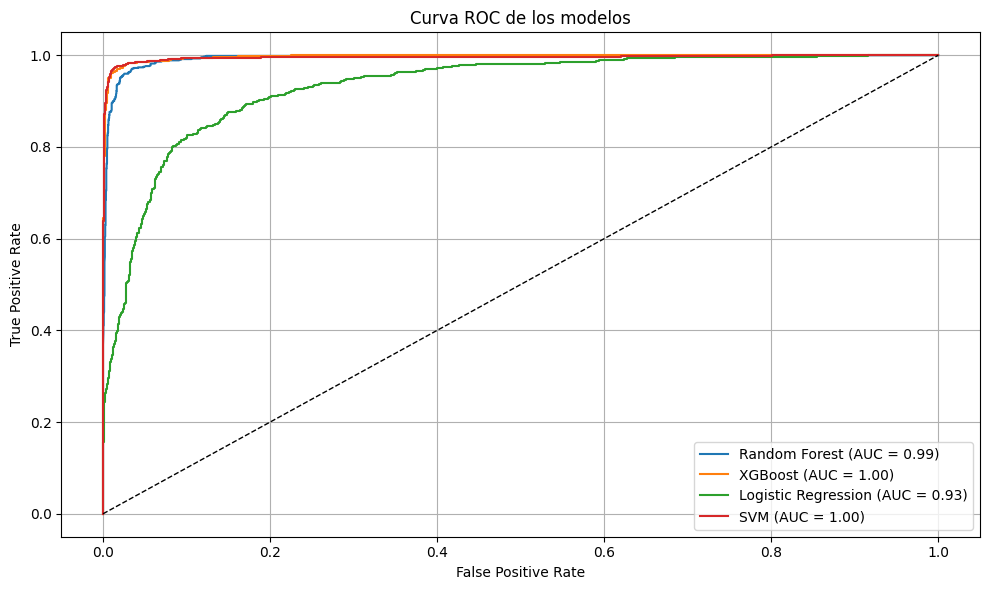

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap
import seaborn as sns

df_final = pd.read_csv('data_insecta_B.csv')

df_final['is_insecta'] = df_final['is_insecta'].astype(bool).astype(int)
X = df_final.drop(columns=['is_insecta'])
y = df_final['is_insecta']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train) 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=50,
        max_depth=30,
        min_samples_leaf=2,
        min_samples_split=3,
        max_features='log2',
        class_weight=None,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        reg_alpha=3.573706220951915e-08,            
        reg_lambda=0.05656892005067827,            
        max_depth=50,
        learning_rate=0.13108330652110958,
        n_estimators=300,
        subsample=0.8493524165350043,
        colsample_bytree=0.5080482527535995,
        gamma=0.09866712217160956,
        min_child_weight=8,
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        penalty='elasticnet',            
        C=0.0422633582892231,                  
        solver='saga', 
        max_iter=1000,
        l1_ratio=0.41874855004887884,
        class_weight=None,
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',
        C=9.905531631467932,                  
        probability=True,
        random_state=42,
        gamma='scale',
        class_weight='balanced',
        tol=0.002862765973863674
    ),
}

resultados = []

def evaluar(nombre, y_test, y_pred, y_proba):
    resultados.append({
        'Modelo': nombre,
        'Precision': round(float(precision_score(y_test, y_pred)), 4),
        'Recall': round(float(recall_score(y_test, y_pred)), 4),
        'F1-Score': round(float(f1_score(y_test, y_pred)), 4),
        'AUC': round(float(roc_auc_score(y_test, y_proba)), 4)
    })

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        modelo.fit(X_train_scaled, y_train_bal)
        y_pred = modelo.predict(X_test_scaled)
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train_bal, y_train_bal)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1]

    evaluar(nombre, y_test, y_pred, y_proba)

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = modelo.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC de los modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Mejores Modelos para M1-Insecta

                Modelo  Precision  Recall  F1-Score     AUC
0        Random Forest     0.9475  0.9223    0.9347  0.9950
1              XGBoost     0.9575  0.9394    0.9484  0.9965
2  Logistic Regression     0.6333  0.8636    0.7308  0.9429
3                  SVM     0.9619  0.9564    0.9592  0.9963


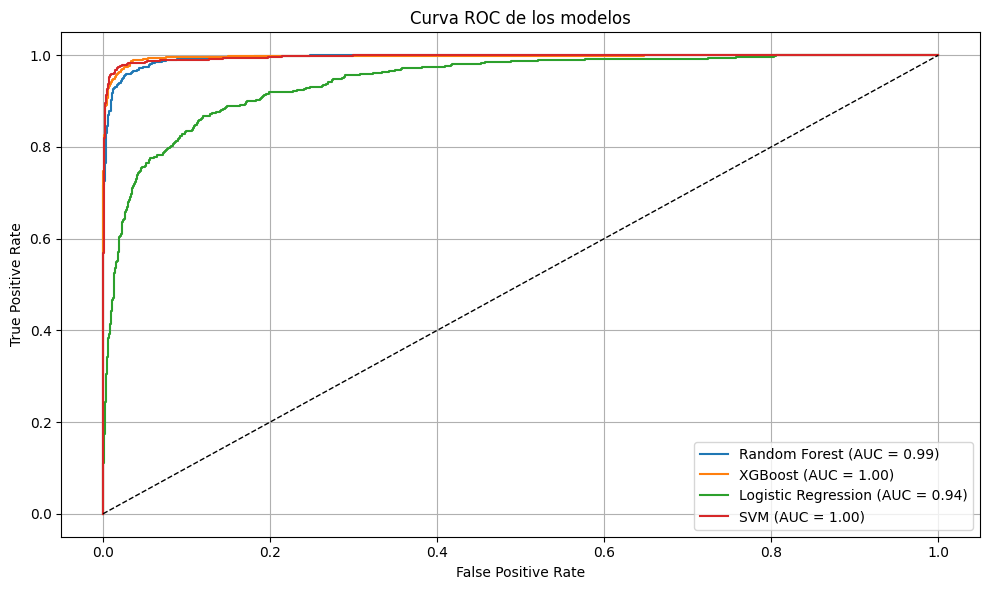

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap
import seaborn as sns

df_final = pd.read_csv('data_insecta_M1.csv')

df_final['is_insecta'] = df_final['is_insecta'].astype(bool).astype(int)
X = df_final.drop(columns=['is_insecta'])
y = df_final['is_insecta']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train) 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal) 
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=25,
        min_samples_leaf=1,
        min_samples_split=8,
        max_features="log2",
        class_weight=None,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        reg_alpha=0.721652226276354,              
        reg_lambda=0.007543097426387369,        
        max_depth=35,
        learning_rate=0.11314669686406317,
        n_estimators=300,
        subsample=0.8005417241598798,
        colsample_bytree=0.8058209580494013,
        gamma=0.0360524506306521,
        min_child_weight=9,
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        penalty='l1',                
        C=0.16088543957298349,                     
        max_iter=1000,
        class_weight=None,
        solver='saga', 
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',
        C=147.17864764937576,             
        probability=True,
        random_state=42,
        gamma='auto',
        class_weight=None,
        tol=0.0016969532884388995
    ),
}

resultados = []

def evaluar(nombre, y_test, y_pred, y_proba):
    resultados.append({
        'Modelo': nombre,
        'Precision': round(float(precision_score(y_test, y_pred)), 4),
        'Recall': round(float(recall_score(y_test, y_pred)), 4),
        'F1-Score': round(float(f1_score(y_test, y_pred)), 4),
        'AUC': round(float(roc_auc_score(y_test, y_proba)), 4)
    })

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        modelo.fit(X_train_scaled, y_train_bal)
        y_pred = modelo.predict(X_test_scaled)
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train_bal, y_train_bal)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1]

    evaluar(nombre, y_test, y_pred, y_proba)

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = modelo.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

# Diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC de los modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Mejores Modelos para M2-Insecta

c:\Users\Tommy\.conda\envs\opensoundscape\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


                Modelo  Precision  Recall  F1-Score     AUC
0        Random Forest     0.9781  0.9225    0.9495  0.9922
1              XGBoost     0.9702  0.9251    0.9471  0.9926
2  Logistic Regression     0.6667  0.8786    0.7581  0.9525
3                  SVM     0.9601  0.9328    0.9463  0.9937


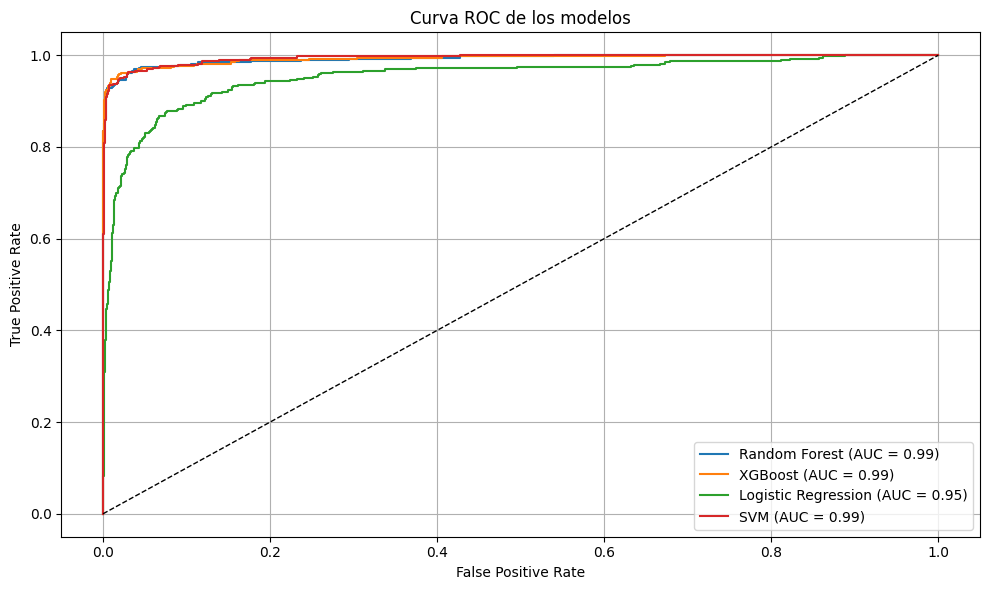

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap
import seaborn as sns

df_final = pd.read_csv('data_insecta_M2.csv')

df_final['is_insecta'] = df_final['is_insecta'].astype(bool).astype(int)
X = df_final.drop(columns=['is_insecta'])
y = df_final['is_insecta']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train) 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=250,
        max_depth=40,
        min_samples_leaf=2,
        min_samples_split=10,
        max_features='log2',
        class_weight='balanced',
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        reg_alpha=0.18986410547283059,      
        reg_lambda=5.715434211084247e-07,          
        max_depth=5,
        learning_rate=0.23609343440151934,
        n_estimators=250,
        subsample=0.9478447020285832,
        colsample_bytree=0.5602621690070864,
        gamma=0.5290264150139972,
        min_child_weight=3,
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        penalty='l1',               
        C=0.29881033209204877,                       
        solver='saga', 
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',
        C=22.508364163370423,                
        probability=True,
        random_state=42,
        gamma='scale',
        class_weight='balanced',
        tol=0.005672446780380371
    ),
}

resultados = []

def evaluar(nombre, y_test, y_pred, y_proba):
    resultados.append({
        'Modelo': nombre,
        'Precision': round(float(precision_score(y_test, y_pred)), 4),
        'Recall': round(float(recall_score(y_test, y_pred)), 4),
        'F1-Score': round(float(f1_score(y_test, y_pred)), 4),
        'AUC': round(float(roc_auc_score(y_test, y_proba)), 4)
    })

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        modelo.fit(X_train_scaled, y_train_bal)
        y_pred = modelo.predict(X_test_scaled)
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train_bal, y_train_bal)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1]

    evaluar(nombre, y_test, y_pred, y_proba)

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = modelo.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC de los modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()